# 순환 신경망 - 나비야
- 출처 : https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/

### 기본 LSTM 모델
- 128 메모리 셀을 가진 LSTM 레이어 1개와 Dense 레이어로 구성
- 입력은 샘플이 50개, 타임스텝이 4개, 속성이 1개로 구성
- 상태유지(stateful) 모드 비활성화

### 다층 퍼셉트론 모델

In [1]:
# 사용할 패키지 불러오기
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical

In [2]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [4]:
# 데이터 준비하기

# 코드 사전 정의
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}
idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [5]:
# 시퀀스 데이터 정의하고 데이터셋 생성
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
dataset = seq2dataset(seq, window_size = 4)

dataset.shape

(50, 5)

In [6]:
# 입력(X)과 출력(Y) 변수로 분리하기
X_train = dataset[:, :-1]
y_train = dataset[:, -1] # 한줄이라 y는 소문자로 표시 / 맨 앞에서부터 4개

MAX_IDX_VALUE = 13

In [7]:
# 입력값 정규화 시키기
X_train = X_train / float(MAX_IDX_VALUE)
X_train.shape

(50, 4)

In [8]:
# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
X_train = np.reshape(X_train, (50, 4, 1))

In [9]:
# 라벨값에 대한 one-hot 인코딩 수행
Y_train = to_categorical(y_train)
one_hot_vec_size = Y_train.shape[1]
one_hot_vec_size

12

### 모델 정의 / 설정/ 학습/ 평가

In [10]:
# 모델 구성하기
model = Sequential()
model.add(LSTM(128, input_shape = (4, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 12)                1548      
Total params: 68,108
Trainable params: 68,108
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# 모델 학습시키기
history = model.fit(X_train, Y_train, epochs=2000, batch_size=14, verbose=2)

Epoch 1/2000
4/4 - 2s - loss: 2.4592 - accuracy: 0.2400
Epoch 2/2000
4/4 - 0s - loss: 2.4141 - accuracy: 0.3400
Epoch 3/2000
4/4 - 0s - loss: 2.3656 - accuracy: 0.3400
Epoch 4/2000
4/4 - 0s - loss: 2.3161 - accuracy: 0.3400
Epoch 5/2000
4/4 - 0s - loss: 2.2507 - accuracy: 0.3400
Epoch 6/2000
4/4 - 0s - loss: 2.1860 - accuracy: 0.3400
Epoch 7/2000
4/4 - 0s - loss: 2.1084 - accuracy: 0.3400
Epoch 8/2000
4/4 - 0s - loss: 2.0424 - accuracy: 0.3400
Epoch 9/2000
4/4 - 0s - loss: 1.9933 - accuracy: 0.3400
Epoch 10/2000
4/4 - 0s - loss: 1.9783 - accuracy: 0.3400
Epoch 11/2000
4/4 - 0s - loss: 1.9669 - accuracy: 0.3400
Epoch 12/2000
4/4 - 0s - loss: 1.9523 - accuracy: 0.3400
Epoch 13/2000
4/4 - 0s - loss: 1.9377 - accuracy: 0.3400
Epoch 14/2000
4/4 - 0s - loss: 1.9311 - accuracy: 0.3400
Epoch 15/2000
4/4 - 0s - loss: 1.9246 - accuracy: 0.3400
Epoch 16/2000
4/4 - 0s - loss: 1.9177 - accuracy: 0.3400
Epoch 17/2000
4/4 - 0s - loss: 1.9117 - accuracy: 0.3400
Epoch 18/2000
4/4 - 0s - loss: 1.9110 - 

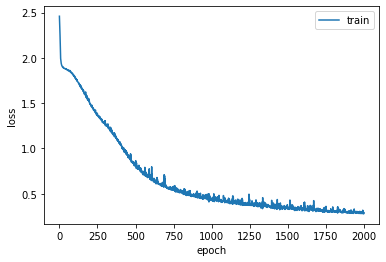

In [13]:
# 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

### 평가

In [14]:
# 모델 평가하기
scores = model.evaluate(X_train, Y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 8ms/step - loss: 0.2785 - accuracy: 0.9000
accuracy: 90.00%


In [15]:
# 모델 사용하기
pred_count = 50   # 최대 예측 개수 정의

In [16]:
# 한 스텝 예측
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(X_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


### 노래듣기
[노래듣기](https://tykimos.github.io/warehouse/2017-4-9-MLP_one_step_prediction.mp3)

In [18]:
# 곡 전체 예측
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(MAX_IDX_VALUE) for it in seq_in]  # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1))    # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(MAX_IDX_VALUE))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8']


[노래 듣기](https://tykimos.github.io/warehouse/2017-4-9-MLP_full_song_prediction.mp3)